In [1]:
# Import libraries
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [2]:
# Load audio data files
pianoFile = "Datasets/Piano.wav"
#ipd.Audio(pianoFile)
piano, sr = librosa.load(pianoFile)  # load the file and set the sample rate

In [3]:
# Change data into time-frequency domain format by extracting the short-time fourier transform
FRAME_SIZE = 2048 
HOP_SIZE = 512
stft_piano = librosa.stft(piano, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)  
#stft_piano.shape
# calculate squared magnitude of the stft result for spectrogram plotting
spec_piano = np.abs(stft_piano) ** 2

In [4]:
# Function to plot a spectrogram given the spec data, sample rate, hop length and y-axis type
def PlotSpectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(20,10))
    # specshow will display spectrogram type singals
    librosa.display.specshow(Y,
                            sr=sr,
                            hop_length=hop_length,
                            x_axis="time",
                            y_axis=y_axis)
    plt.colorbar(format="%+2.f dB")

/home/shaun/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/shaun/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/shaun/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


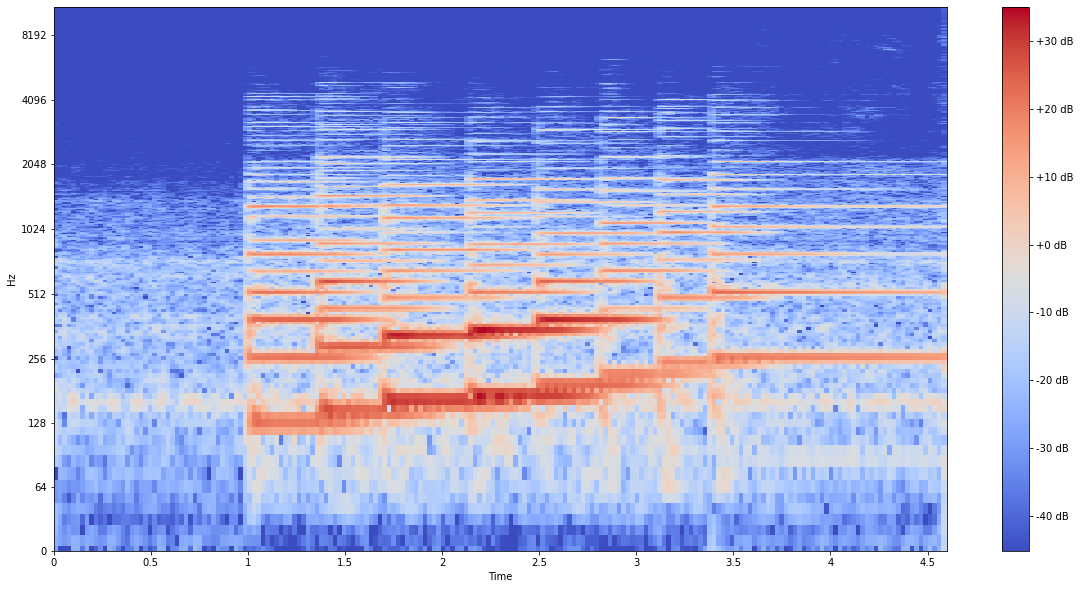

In [5]:
#PlotSpectrogram(spec_piano, sr, HOP_SIZE)  # linear amplitude spectrogram

log_spec_piano = librosa.power_to_db(spec_piano)  # logarithmic amplitude spectrogram
PlotSpectrogram(log_spec_piano, sr, HOP_SIZE, y_axis="log")  # scale the y-axis for log data